Author: Atticus Patrick

In [2]:
#import necessary packages
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [3]:
#read in data
ski = pd.read_csv("ski_resort_stats.csv")

In [4]:
#filter for New England States
NE = ['Maine', 'New Hampshire ', 'Massachusetts ', 'Vermont', 'Rhode Island', 'Connecticut']
ski_NE = ski.loc[ski['state'].isin(NE)]

In [5]:
#check for any NAs
ski_NE[ski_NE.isna().any(axis = 1)]

,resort_name,state,cost,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon
82,"Black Mountain, ME",Maine,NaN,2460.0,1080.0,1380.0,3.0,35.0,48,NaN,0.00,NaN,0.00,NaN,0.0,45.18,-70.67
84,"Lost Valley, ME",Maine,NaN,NaN,NaN,240.0,2.0,17.0,45,0.30,13.50,0.50,22.50,0.2,9.0,44.12,-70.27
94,"Blanford, MA",Massachusetts,NaN,1685.0,1220.0,465.0,5.0,22.0,158,0.40,63.20,0.50,79.00,0.1,15.8,42.18,-72.93
176,"Granite Gorge, NH",New Hampshire,399.0,NaN,NaN,525.0,2.0,17.0,25,0.35,8.75,0.35,8.75,0.3,7.5,42.97,-72.21


In [6]:
#remove rows with NA
ski_NE1 = ski_NE.dropna()
ski_NE1[ski_NE1.isna().any(axis = 1)]

,resort_name,state,cost,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon


Exploratory Data Analysis

['resort_name', 'state', 'cost', 'summit', 'base', 'vertical', 'lifts', 'runs', 'acres', 'green_percent', 'green_acres', 'blue_percent', 'blue_acres', 'black_percent', 'black_acres', 'lat', 'lon']


<AxesSubplot:>

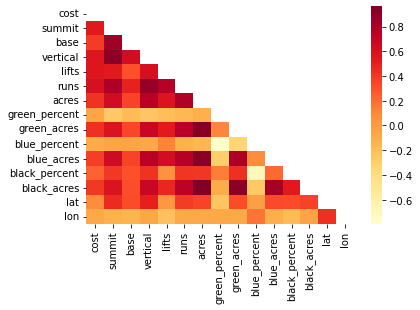

In [7]:
import matplotlib.pyplot as plt

#create correlation matrix
corr = ski_NE1.corr()
labels = []
for col in ski_NE1.columns:
    labels.append(col)
#check labels are stored
print(labels)
# plot correlation matrix
corr = ski_NE1.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=False, mask=matrix, cmap = 'YlOrRd', xticklabels=True, yticklabels=True)

There is plenty of collinearity between the green acres, blue acres, black acres, and acres, so we'll just use acres. Summit appears to have high collinearity with vertical, base, runs, and we'll drop this, we don't need lat and lon either. Green, blue, black trail percentages seem to be irrelevant to cost.

In [8]:
#drop columns that don't give us much information about cost
ski_NE1 = ski_NE1.drop(['lat', 'lon', 'green_acres', 'blue_acres', 'black_acres', 'summit', 'blue_percent', 'green_percent', 'black_percent'], axis = 1)

In [9]:
#check the right columns remain
print(ski_NE1.keys())

Index(['resort_name', 'state', 'cost', 'base', 'vertical', 'lifts', 'runs',
       'acres'],
      dtype='object')


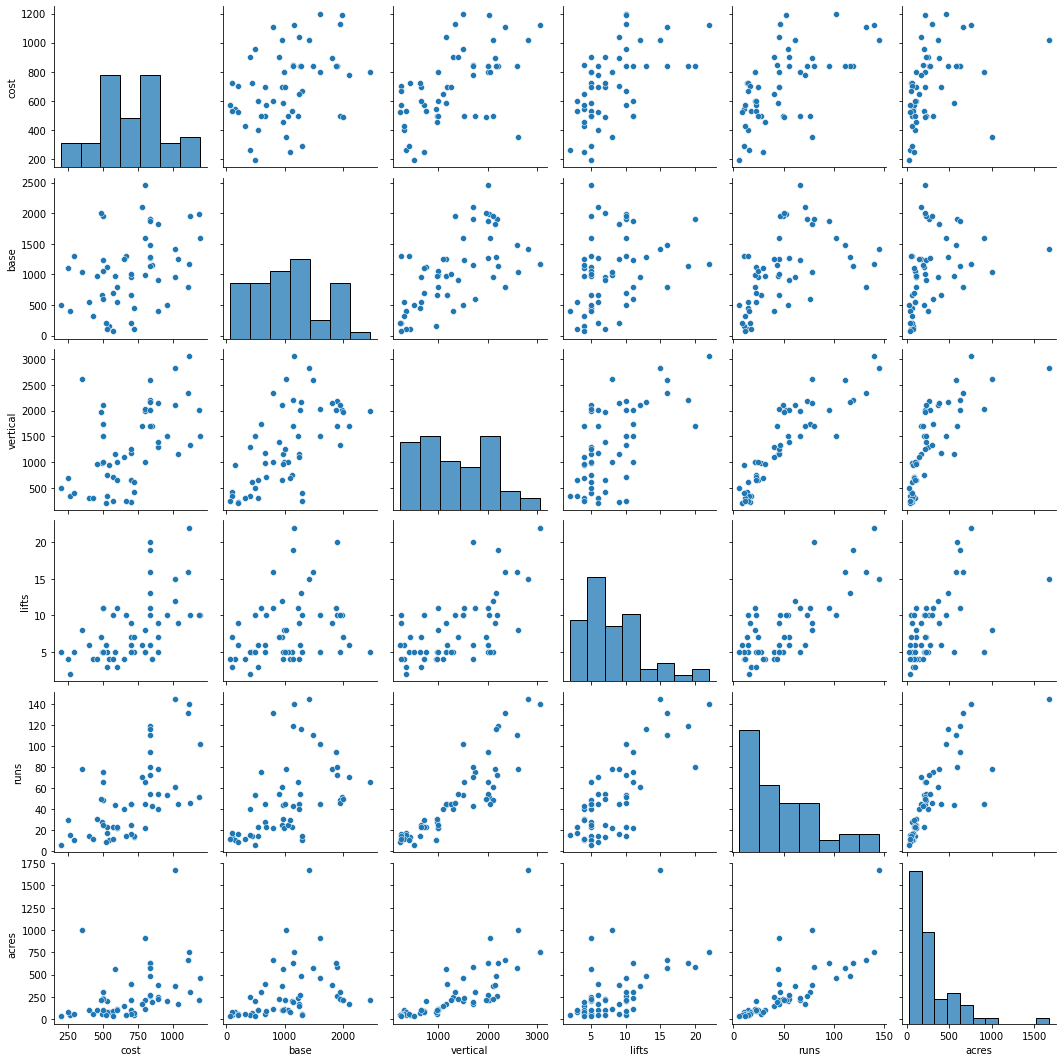

In [10]:
#create a pairplot
ski_NE_pair = ski_NE1.drop(['resort_name','state'], axis = 1)
sns.pairplot(ski_NE_pair)

It looks like runs, lifts, and vertical have a relatively positive, moderate relationship with cost.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Connecticut'),
  Text(1, 0, 'Maine'),
  Text(2, 0, 'Massachusetts '),
  Text(3, 0, 'New Hampshire '),
  Text(4, 0, 'Rhode Island'),
  Text(5, 0, 'Vermont')])

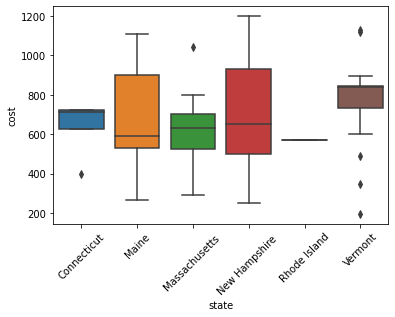

In [11]:
#break down season pass costs by state
sns.boxplot(x = 'state', y = 'cost', data = ski_NE1)
plt.xticks(rotation=45)

Vermont seems to have more expensive costs, but has a big range of costs as well with quite a few outside of the IQR. For the amount of mountains it has to offer, Maine appears to be the most affordable.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Connecticut'),
  Text(1, 0, 'Maine'),
  Text(2, 0, 'Massachusetts '),
  Text(3, 0, 'New Hampshire '),
  Text(4, 0, 'Rhode Island'),
  Text(5, 0, 'Vermont')])

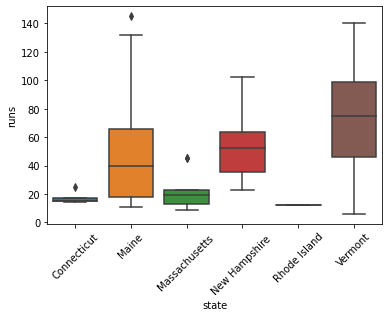

In [12]:
#number of runs by state
sns.boxplot(x = 'state', y = 'runs', data = ski_NE1)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Connecticut'),
  Text(1, 0, 'Maine'),
  Text(2, 0, 'Massachusetts '),
  Text(3, 0, 'New Hampshire '),
  Text(4, 0, 'Rhode Island'),
  Text(5, 0, 'Vermont')])

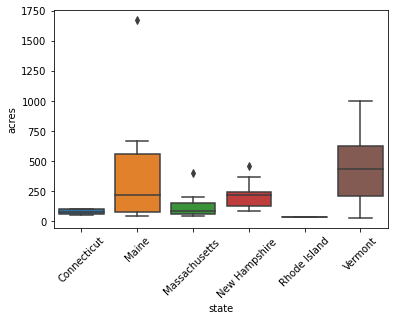

In [13]:
#amount of acres by state
sns.boxplot(x = 'state', y = 'acres', data = ski_NE1)
plt.xticks(rotation=45)

Regression Analysis - can we find what influences season pass cost?

In [14]:
#simple linear regression for cost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.preprocessing import StandardScaler

#split into train and test data
ski_NE2 = ski_NE1.drop(['resort_name','cost','state'], axis = 1)
X = ski_NE2
y = ski_NE1['cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train and deploy linear model
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.4059854911886278
0.352392839201631


In [15]:
#determine the coefficients
coef = lm.coef_
tags = list(ski_NE2.keys())
for i in range(5):
    print('Feature: ' + tags[i] + ', Score: ', end="", flush=True)
    print(coef[i])

Feature: base, Score: 43.64187145126232
Feature: vertical, Score: -4.232625010927713
Feature: lifts, Score: 71.48678709294505
Feature: runs, Score: 112.89460844110384
Feature: acres, Score: -43.78094698990988


The linear model did not perform well here, only achieving an accuracy score of 0.352 with the test data. The most influential predictors for this model, however, were amount of runs and amount of lifts. This makes sense considering bigger mountains generally charge more. The low accuracy score suggests there are plenty of mountains that do not fit this trend, meaning many mountains either under charge or over charge for the number of runs and lifts they provide.

In [17]:
#ridge regression with cross validation to use the best alpha value
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
regCV = RidgeCV(alphas=[0.1, 1.0, 3.0, 5.0, 7.0, 10.0])
regCV.fit(X_train, y_train)

print(regCV.score(X_train, y_train))
print(regCV.score(X_test, y_test))

0.39239076624450075
0.40188462271137926


In [21]:
coef = regCV.coef_
tags = list(ski_NE2.keys())
for i in range(5):
    print('Feature: ' + tags[i] + ', Score: ', end="", flush=True)
    print(coef[i])

Feature: base, Score: 33.531919110327706
Feature: vertical, Score: 24.546089710013888
Feature: lifts, Score: 64.60160266497866
Feature: runs, Score: 59.06719208247016
Feature: acres, Score: -13.351698604464742


In [19]:
#lasso regression with cross validation to use the best alpha value
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
lasCV = LassoCV(alphas=[0.1, 1.0, 3.0, 5.0, 7.0, 10.0])
lasCV.fit(X_train, y_train)

print(lasCV.score(X_train, y_train))
print(lasCV.score(X_test, y_test))

0.39189155103702666
0.386836327808438


In [20]:
coef = lasCV.coef_
tags1 = list(ski_NE2.keys())
for i in range(5):
    print('Feature: ' + tags1[i] + ', Score: ', end="", flush=True)
    print(coef[i])

Feature: base, Score: 35.718537057022495
Feature: vertical, Score: 0.0
Feature: lifts, Score: 69.40609883539395
Feature: runs, Score: 70.05514513214072
Feature: acres, Score: -0.0


Ridge regression only improves test accuracy to 0.402 and Lasso regression only improves test accuracy to 0.387, showing that there is likely not a surefire way to predict season pass costs with regression solely based on numerical factors relating to amount of runs, amount of lifts, and mountain size. This suggests that consumers should not expect all season passes of the same price to offer the same number of lifs or runs available from mountain to mountain.